* * *
<pre> NYU Paris            <i> Numerical Analysis - Spring 2024 </i></pre>
* * *


<h1 align="center"> Recitation 1: Introduction to Python </h1>

<pre align="left"> January 25th 2024               <i> Author: Hicham Janati & Igor Colin </i></pre>
* * *


##### Goals:
- Have a working Python / Jupyter environment with packages installed
- Know where to look for information: external resources & documentation
- Discover core packages of the Python ecosystem:
    1. `Numpy` for scientific computing
    2. `Matplotlib` for plotting and visualization

# 1 - Getting started with Jupyter
1. Anaconda is a large Python distribution software that includes  several Python packages and tools and simplifies their management. If you do not have it installed on your laptop go over to <a href=https://docs.anaconda.com/anaconda/install/>the official documentation</a> and follow the OS dependent installation guidelines.
2. Create a labs folder for the Python labs of this course. For me, this path is `/Users/igor/teaching/nyu/labs`. Download the notebook `introduction_python.ipynb` from [here](https://aiteachings.github.io/NYU-AI-Fall23/lectures/) and save it in that folder.
3. Now we need to launch Jupyter from the labs folder. To do so, open the Anaconda Terminal (Anaconda Prompt). A command line window should pop up. If you are not familiar with line commands, for our purposes all you need to know is:
* Know what folder your terminal is in: `pwd` (print working directory) for Linux/Mac | `cd` for windows.
* List the content of the current folder: `ls` for Linux/Mac | `dir` for Windows.
* Change the current folder: `cd` followed by the subfolder you want to go to. Below, we complete the path with `work/teaching/NYU/code`:

![terminal-screenshot](img/terminal.png)

4. Now launch Jupyter by running: `jupyter notebook` which should open the browser. You should be able to access and run this notebook.

# 2 - Getting started: Python in Jupyter

## 2.1 running cells and magic commands
The following Python cell is a naive loop that stores the first 10 million numbers. Click-on then hit `Shift+Enter` to run it.

In [1]:
%%time

N = 10_000_000 # underscores in whole numbers are ignored by Python

numbers = []  # create an empty list
for ii in range(N):
    numbers.append(ii) # add the number to the list
total = sum(numbers)

print(f"The total is {total}")

The total is 49999995000000
CPU times: user 576 ms, sys: 68 ms, total: 644 ms
Wall time: 644 ms


The `%%time` in the beginning of the cell is called a _magic command_ that keeps track of the time it took the CPU to run the entire cell. Magic commands with one percentage apply for one lines only:

In [2]:
%time print("The total is", sum([ii for ii in range(N)]))

The total is 49999995000000
CPU times: user 224 ms, sys: 139 ms, total: 362 ms
Wall time: 362 ms



### Question 1: 
Lists created with loops from within are this one are called _list comprehensions_.
Can you guess why is this list comprehension 2x faster than the classic loop above ?

## 2.3 Jupyter cells: code, markdown and shortcuts

One of the main advantages of Jupyter is the ability to alternate between text cells (such as the one you are reading right now) and Python cells. Double-click on this text to edit it. Press `Shift + Enter` to leave Edit Mode.

Text cells are actually *Markdown* cells. Markdown is a _super_ light formatting language. As you probably noticed by editing some of these cells, **double asterisks make text bold**, while _underscores make text italic_. But I digress, Markdown is a long story for another day, check [the documentation](https://www.markdownguide.org/getting-started/) for more. More importantly, here is how to create one:

1. Enable the _command mode_ by hitting `Esc`. Command mode in Jupyter makes the cursor disappear.
2. Press `M` to switch from code to Markdown
3. Or press `Y` to switch from Markdown to code.

Several other shortcuts exist in the _command mode_. The ones I usually are:
1. `A` to add a new cell above
2. `B` to add a new cell below
3. `Enter` to go into Edit Mode and edit a cell
4. `H` to open the help and check all other shortcuts

Keep in mind these shortcuts only work in Command Mode (i.e after pressing `Esc`).

## 2.3 The Numpy library

#### Speed and vectorization

Let's write code performing the same counting operation above but using the `Numpy` library. 

In [3]:
import numpy as np

In [4]:
%%time
N = 10_000_000
numbers = np.arange(N)  # creates an array of integers from 0 to N-1
total = numbers.sum()   # sums the array
print(f"The total is {total}")

The total is 49999995000000
CPU times: user 86.9 ms, sys: 28.5 ms, total: 115 ms
Wall time: 114 ms


As you can see `Numpy` is 3x faster than list comprensions and code is much shorter. `Numpy` should always be preferred to native Python lists when dealing with nothing but numbers and matrices. `Numpy` vectorizes operations: instead of going through the elements one by one as in a for loop, operations are applied at the same time.

The dot product between two arrays x, y of length n is given by: $<x, y> = x^{\top} y = \sum_{i=1}^n x_i y_i$. 

### Question 2:
Complete the following cells to compare the speed of dot products using native loops vs the numpy operation `result = x.dot(y)`.

In [5]:
## TO DO

N = 10_000_000
x = np.random.randn(N)  # creates a list of random numbers following the Gaussian bell curve distribution
y = np.random.randn(N)

result_loops =   ### TO DO

### TO DO 


SyntaxError: invalid syntax (37206399.py, line 7)

In [6]:
# TODO

result_numpy =   # TODO
print(result_numpy)

SyntaxError: invalid syntax (1592493750.py, line 3)

#### Numpy slicing

Numpy offers a simple way to select subsets of the array called slicing. To get the slice from the 3-th to the 5-th element for instance:

In [7]:
x = np.arange(10)
print("All the array: ", x)
print("A slice: ", x[2:5])

All the array:  [0 1 2 3 4 5 6 7 8 9]
A slice:  [2 3 4]


Remember that Python starts indexing with 0 and that a slice [start:end] includes `start` but excludes `end`. If ommitted, `start` is set to 0, and `end` is the last index of the array. Picking the first 6 elements:

In [8]:
x[:6]

array([0, 1, 2, 3, 4, 5])

To omit the last number, one can use negative indices. For example:

In [9]:
x[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
x[:-3]

array([0, 1, 2, 3, 4, 5, 6])

Slices can also have a third parameter which is a `step`. So far we omitted this argument which is by default equal to 1. Starting at 0, we can pick even indices by using a step of 2:

In [11]:
x[0:10:2]

array([0, 2, 4, 6, 8])

We can omit the start and end arguments since they are not doing anything:

In [12]:
x[::2]

array([0, 2, 4, 6, 8])

### Question 3:
Create a slice that picks odd numbers in reverse order using one slice only.

## 2.4 Matplotlib: plotting and visualization

###### Example 1: curve plot
We want to plot the function $f: x \to x^2$ over the range $[-5, 5]$.
To do so we create a regular grid of 1000 numbers in $[-5, 5]$ using the Numpy function `linspace`.

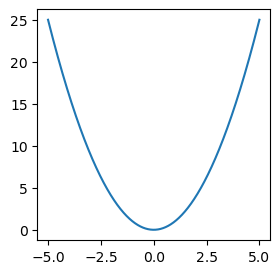

In [13]:
import matplotlib.pyplot as plt

# we create our square function

def f(x):
    return x ** 2 # basic operations are applied element-wise to numpy arrays

n = 1000
x = np.linspace(-5, 5, n)
fx = f(x) 

plt.figure(figsize=(3, 3))
plt.plot(x, fx)
plt.show()

We can improve the quality of this visualization by adding:
- a grid
- a title 
- labels for axes

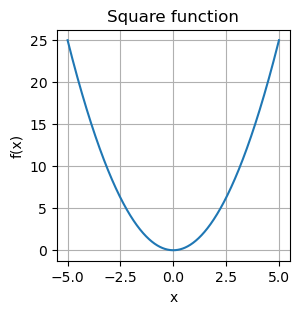

In [14]:
plt.figure(figsize=(3, 3))
plt.plot(x, fx)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Square function")
plt.show()

### Question 4
Assume you forgot what the function `np.linspace` takes as arguments. You can either:
- Look up the Numpy documentation directly (numpy linspace search on google should immediately lead you to numpy.org) 
- Run the following cell to get the documentation window on Jupyter:

In [15]:
np.linspace?

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7fb9c51b2c00>
File:            ~/miniconda3/lib/python3.11/site-packages/numpy/core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value 

##### Example 2: scatter plot

Assume we have data of grades obtained by 10 students and the number of hours spent on assignments per week.  

In [16]:
data = np.array([[80, 3],
                 [71, 4],
                 [95, 6],
                 [62, 1],
                 [68, 0],
                 [100, 5],
                 [95, 7],
                 [95, 5],
                 [83, 3],
                 [71, 2],
                 [80, 3],
                 [82, 2],
                 [80, 5],
                 [80, 4],
                 [86, 6],
                 [84, 8]])

print(data.shape)

(16, 2)


We visualize these data points as 2D coordinates, each student represented by a dot. To do so we call the `scatter` function of matplotlib.

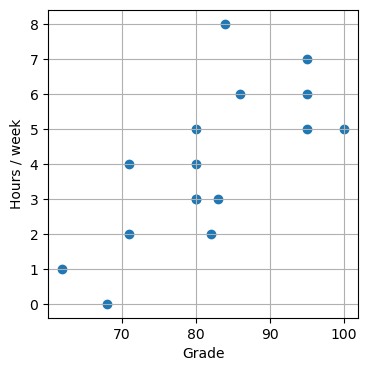

In [17]:
plt.figure(figsize=(4, 4))
plt.scatter(data[:, 0], data[:, 1])
plt.grid(True)
plt.xlabel("Grade")
plt.ylabel("Hours / week")
plt.show()